In [74]:
# import all the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Load and read the dataset

df = pd.read_csv('/content/drive/MyDrive/Machine_learning_dataset/zomato.csv', encoding='latin-1')

In [76]:
# Know which columns are present in this dataset

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [77]:
# to get the concise summary of a DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [78]:
# Create a dictionary of columns with missing values and their corresponding null counts

null_counts = {col: val.isnull().sum() for col, val in df.items() if val.isnull().any()}
null_counts

{'Cuisines': np.int64(9)}

Text(0.5, 1.0, 'Missing Values Heatmap')

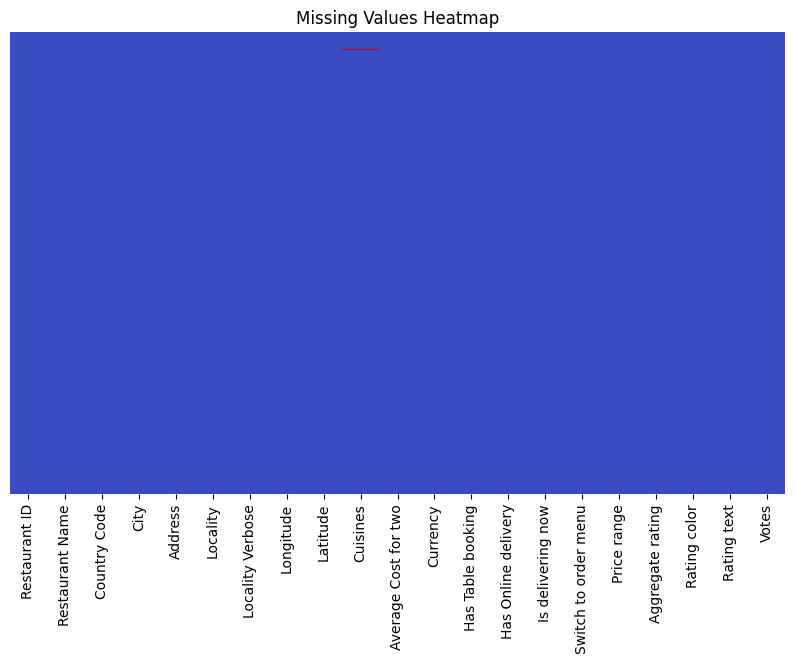

In [79]:
# Visualize missing values in the DataFrame using a heatmap
# Yellow/green cells indicate missing data, helping to identify patterns of null values

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')
plt.title('Missing Values Heatmap')

In [80]:
df_countrycode = pd.read_excel('/content/drive/MyDrive/Machine_learning_dataset/Country-Code.xlsx')
df_countrycode.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [81]:
# Merge the main DataFrame with the country code DataFrame using a left join on 'Country Code'
# This adds country-related information while keeping all original rows from df

main_df = pd.merge(df, df_countrycode, on='Country Code', how='left')

In [82]:
main_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [83]:
# Display the count of occurrences for each unique country in the 'Country' column


main_df.Country.value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


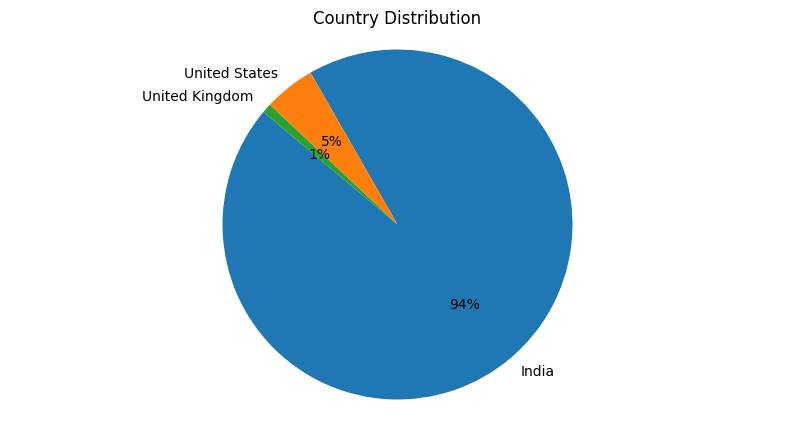

In [84]:
# Get country counts
country_counts = main_df.Country.value_counts()

# Plot as pie chart
plt.figure(figsize=(10, 5))
plt.pie(country_counts[:3], labels=country_counts[:3].index, autopct='%.0f%%', startangle=140)
plt.title('Country Distribution')
plt.axis('equal')  # Keeps the pie circular
plt.show()


In [85]:
# Group by rating, color, and text
rating_df = main_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index(name='Rating Count')

rating_df

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


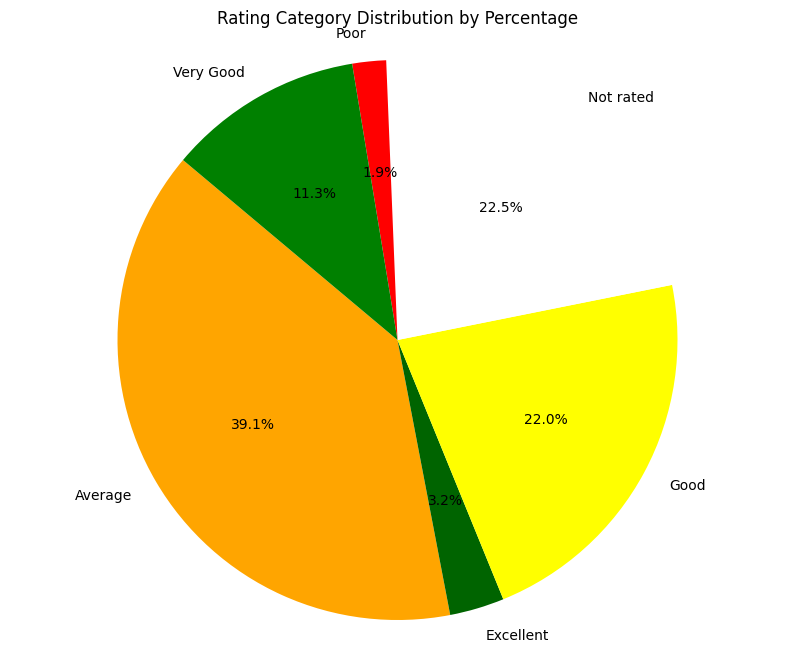

In [86]:
# Group by Rating text and get total count
rating_pie_df = rating_df.groupby(['Rating text', 'Rating color'])['Rating Count'].sum().reset_index()

# Calculate percentages
rating_pie_df['Percentage'] = (rating_pie_df['Rating Count'] / rating_pie_df['Rating Count'].sum()) * 100

# Define color map for matching Rating text to Rating color
color_map = {
    'White': 'white',
    'Red': 'red',
    'Orange': 'orange',
    'Yellow': 'yellow',
    'Green': 'green',
    'Dark Green': 'darkgreen'
}

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    rating_pie_df['Percentage'],
    labels=rating_pie_df['Rating text'],
    colors=[color_map[color] for color in rating_pie_df['Rating color']],
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Rating Category Distribution by Percentage')
plt.axis('equal')  # Equal aspect ratio makes the pie chart round.
plt.show()


In [87]:
# Filter rows where Aggregate rating is 0.0
zero_rating_df = main_df[main_df['Aggregate rating'] == 0.0]
#zero_rating_df

# Get unique list of countries where rating is zero
countries_with_zero_ratings = zero_rating_df['Country'].value_counts()

# Display result
countries_with_zero_ratings


,count
Country,
India,2139
Brazil,5
United States,3
United Kingdom,1


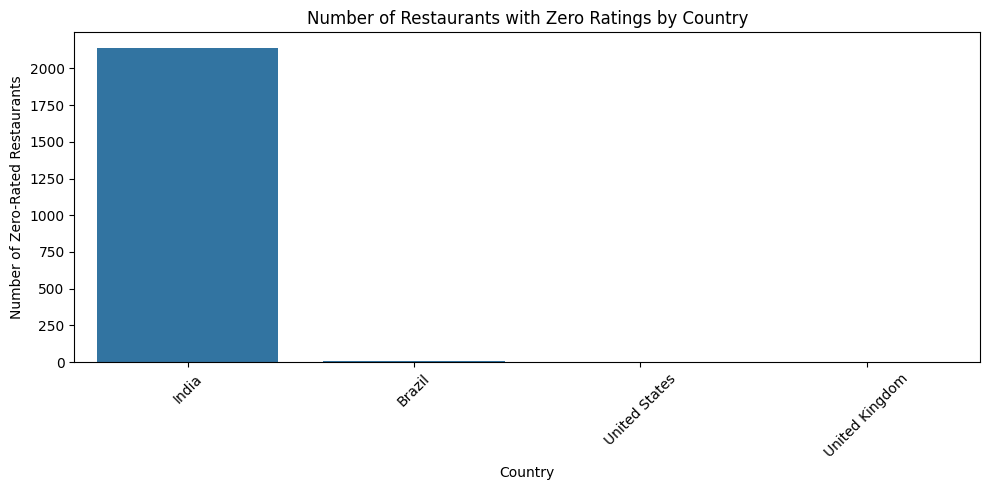

In [88]:
# Plotting the number of restaurants with zero ratings for each country
# This helps visualize which countries have the most unrated restaurants (Aggregate rating = 0.0)


plt.figure(figsize=(10, 5))
sns.barplot(x=countries_with_zero_ratings.index, y=countries_with_zero_ratings.values)
plt.title('Number of Restaurants with Zero Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Number of Zero-Rated Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
# Grouping the data by Country and Currency to see which currencies are used in each country
# and how many restaurants are associated with each (for validation or exploration purposes)

currency = main_df.groupby(['Country','Currency']).size().reset_index(name='count')
currency

,Country,Currency,count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [90]:
# Filtering restaurants that offer online delivery and counting how many are in each country
# Helps identify which countries support online food delivery the most

onl_delivery = main_df[main_df['Has Online delivery']=='Yes'].Country.value_counts()
onl_delivery

#countrys_have_onl_delivery = onl_delivery['Country'].value_counts()
#countrys_have_onl_delivery

,count
Country,
India,2423
UAE,28


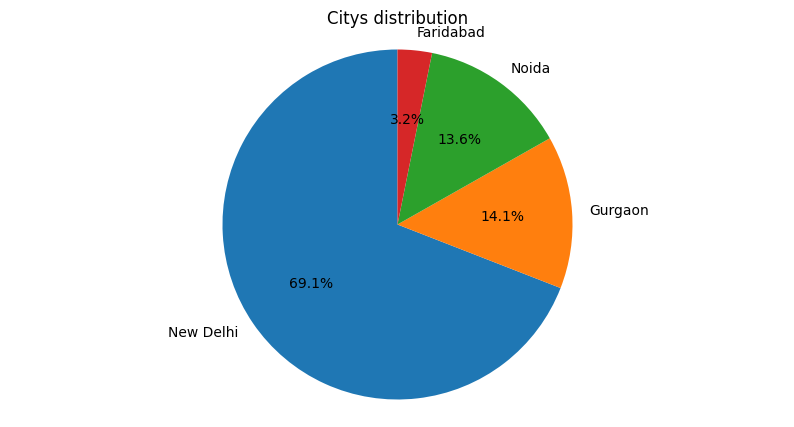

In [91]:
# Plotting a pie chart of the top 4 cities with the most restaurants
# Helps visualize which cities have the highest restaurant distribution

city_distribution = main_df.City.value_counts()

plt.figure(figsize=(10, 5))
plt.pie(city_distribution[:4].values, labels=city_distribution[:4].index, autopct='%1.1f%%', startangle=90)
plt.title('Citys distribution')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()


In [92]:
main_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

<ipython-input-93-bc397d148111>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuisines', y='Count', data=top_ten_cuisines, palette='viridis')


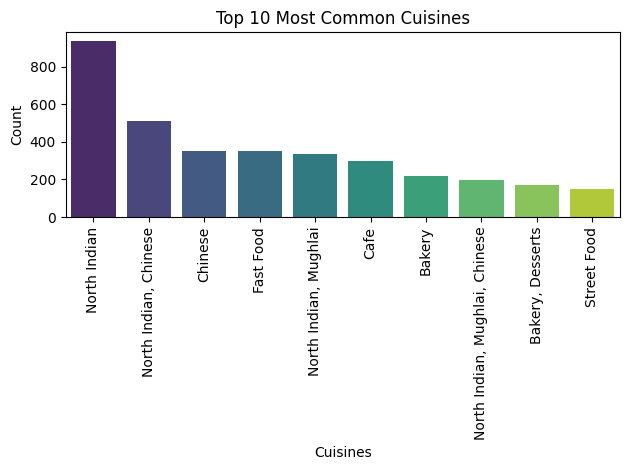

In [93]:
# Getting the top 10 most common cuisines and converting the result into a DataFrame for easier viewing and plotting

top_ten_cuisines = main_df.Cuisines.value_counts().head(10).reset_index()
top_ten_cuisines.columns = ['Cuisines', 'Count']

sns.barplot(x='Cuisines', y='Count', data=top_ten_cuisines, palette='viridis')
plt.title('Top 10 Most Common Cuisines')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
